# CEWA 568 Snow Hydrology 
## HW 4 
### Cassie Lumbrazo

In [1]:
# import libraries we'll need
import urllib
import pandas as pd
import datetime as dt
import xarray as xr
import matplotlib.pyplot as plt
import os
%matplotlib inline

import numpy as np
from datetime import datetime
import requests

In [2]:
## sos_wind_snowflux.nc has no file from the website
# https://mountain-hydrology-research-group.github.io/snow-hydrology/modules/module4.html

In [107]:
# Provide the path to a directory you want to download the SoS files to
download_directory = "../data/sosnoqc"

# Provide the paths to the precipitation file. This file was provided to you, you can either
# specify the path below or put the file in the same directory as this notebook.
precipitation_file = 'precipitation.nc'
windflux_file = 'sos_wind_snowflux.nc'

# Provide a the start and end dates you want to download
start_date = '20221201'
end_date = '20230327'

# Provide the specific variables you want to extract from the dataset.
# We provide these in advance because the datasets are very large and, 
# when we open them, we want to immediately extract only the data we want.
VARIABLES = [
    'spd_1m_ue',
    'spd_3m_ue',
    'spd_10m_ue',
    'SF_avg_1m_ue',
    'SF_avg_2m_ue'
]

In [131]:
sos_dataset_60min=xr.open_dataset("sos_wind_snowflux.nc")

# Create a list of datetime objects for every day between the provided start_date and end_date. 
datelist = pd.date_range(
    dt.datetime.strptime(start_date, '%Y%m%d'),
    dt.datetime.strptime(end_date, '%Y%m%d'),
    freq='d'
).strftime('%Y%m%d').tolist()

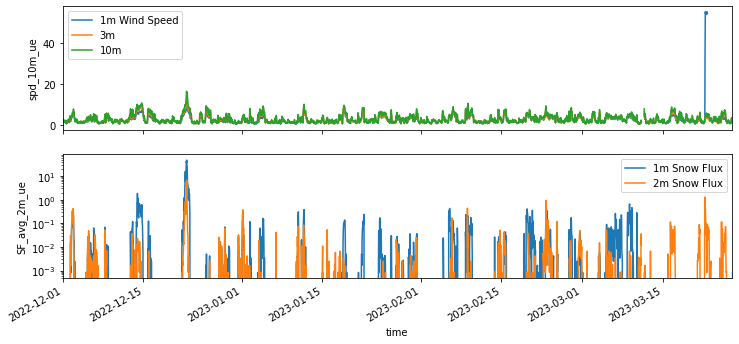

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(12,5), sharex=True)
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[0], label='1m Wind Speed')
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[0], label='3m')
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[0], label='10m')
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[1], label='1m Snow Flux')
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[1], label='2m Snow Flux')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("")
axes[1].set_yscale("log")
axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,27))
plt.show()

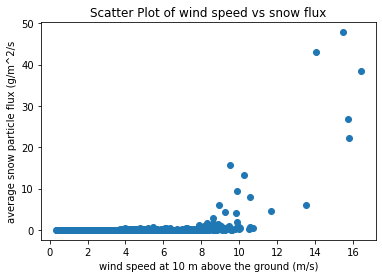

In [133]:
# create a scatter plot of 1 m particle flux vs 10 m wind speed
plt.scatter(sos_dataset_60min.spd_10m_ue, sos_dataset_60min.SF_avg_1m_ue)

# set axis labels and title
plt.xlabel('wind speed at 10 m above the ground (m/s)')
plt.ylabel('average snow particle flux (g/m^2/s')
plt.title('Scatter Plot of wind speed vs snow flux')

# show the plot
plt.show()

In [113]:
def filter_outliers(data, perc=0.99):
  # calculate percentile 
  threshold = data.quantile(perc)
  # find outliers and replace them with max among remaining values 
  mask = data.where(abs(data) <= threshold)
  # max_value = mask.max().values
  # .where replace outliers with nan
  # mask = mask.fillna(max_value)
  data = mask
  return data

sos_dataset_60min1['spd_1m_ue'] = filter_outliers(sos_dataset_60min1['spd_1m_ue']).interp()

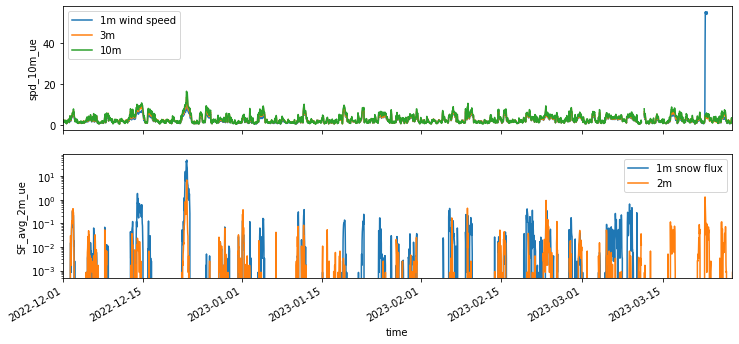

In [134]:
fig, axes = plt.subplots(2, 1, figsize=(12,5), sharex=True)
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[0], label='1m wind speed')
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[0], label='3m')
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[0], label='10m')
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[1], label='1m snow flux')
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[1], label='2m')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("")
axes[1].set_yscale("log")
axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,27))
plt.show()

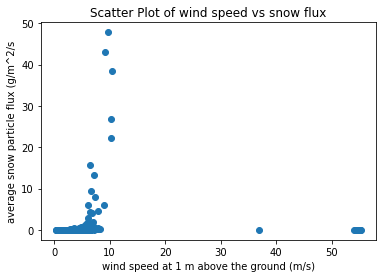

In [135]:
# create a scatter plot of 1 m particle flux vs 1 m wind speed
# maybe it's a better fit
plt.scatter(sos_dataset_60min.spd_1m_ue, sos_dataset_60min.SF_avg_1m_ue)

# set axis labels and title
plt.xlabel('wind speed at 1 m above the ground (m/s)')
plt.ylabel('average snow particle flux (g/m^2/s')
plt.title('Scatter Plot of wind speed vs snow flux')

# show the plot
plt.show()

In [136]:
lidar_particles=xr.open_dataset("lidar_l2_particles.nc")
lidar_particles

<xarray.Dataset>
Dimensions:           (time: 3578)
Coordinates:
  * time              (time) datetime64[ns] 2022-10-12T18:00:00 ... 2023-03-2...
Data variables:
    suspended_points  (time) float64 ...

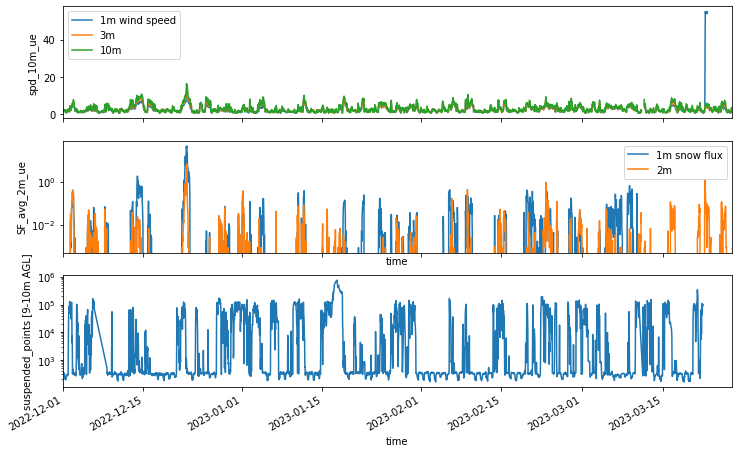

In [138]:
fig, axes = plt.subplots(3, 1, figsize=(12,7), sharex=True)
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[0], label='1m wind speed')
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[0], label='3m')
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[0], label='10m')
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[1], label='1m snow flux')
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[1], label='2m')
lidar_particles['suspended_points'].plot(ax=axes[2], label='10 m lidar snow flux')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel("")
axes[1].set_yscale("log")
axes[2].set_yscale("log")
axes[0].set_xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,27))
plt.show()

# Problem 1, based on combining material in Labs 2 & 3 and Modules 2 & 3
**In Lab 2 and Module 2, we saw that in late December, one of the four snow pillows had a sudden increase in snow water equivalent while the other three had a decrease. In Lab 3, we saw a similar pattern in the snow depth measurements near of the snow pillows. Look at the snow depths, the snow densities, wind speeds, and snow particle fluxes during this period. Create plots to help explain what is happening here. Referencing your plots, explain what happened in Kettle Ponds during this period.**

In [139]:
ds_sos=xr.open_dataset("/home/jovyan/Week2/sos_SWE_T_P.nc")
ds_precip = xr.open_dataset('/home/jovyan/Week2/precipitation.nc')
sntl_ds=xr.open_dataset("/home/jovyan/Week2/sntl_ds.nc")
ds_sos.head()

<xarray.Dataset>
Dimensions:   (time: 5)
Coordinates:
  * time      (time) datetime64[ns] 2022-12-01 ... 2022-12-01T04:00:00
Data variables:
    SWE_p1_c  (time) float32 ...
    SWE_p2_c  (time) float32 ...
    SWE_p3_c  (time) float32 ...
    SWE_p4_c  (time) float32 ...
    T_2m_c    (time) float32 ...

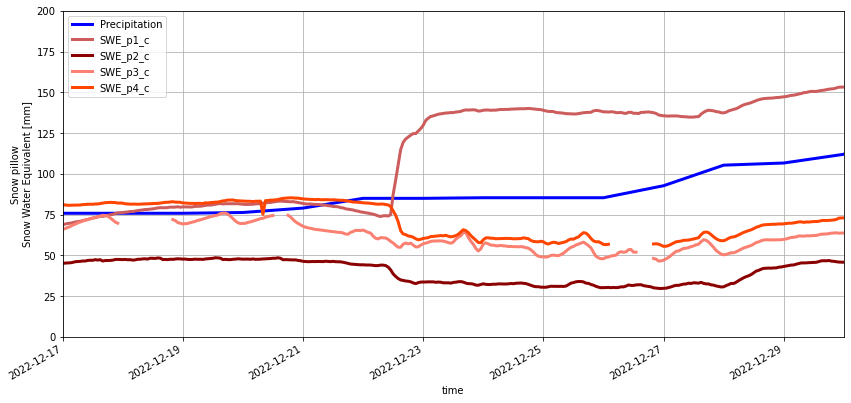

In [140]:
fig, ax = plt.subplots(figsize=(14,6), sharex=True)

ax.plot(ds_precip.date, ds_precip.acc_prec, label='Precipitation', color='blue', linewidth=3)

ds_sos.SWE_p1_c.plot(label='SWE_p1_c', color='indianred', linewidth=3)
ds_sos.SWE_p2_c.plot(label='SWE_p2_c', color='darkred', linewidth=3)
ds_sos.SWE_p3_c.plot(label='SWE_p3_c', color='salmon', linewidth=3)
ds_sos.SWE_p4_c.plot(label='SWE_p4_c', color='orangered', linewidth=3)


plt.legend()
plt.grid()
ax.set_ylabel("Snow pillow\nSnow Water Equivalent [mm]")
ax.set_xlim(dt.datetime(2022,12,17), dt.datetime(2022,12,30))
ax.set_ylim(0,200)
plt.show()

In [141]:
ds1=xr.open_dataset("/home/jovyan/Week3/lidar/lidar_l1_pillow_depths.nc")
ds2=xr.open_dataset("/home/jovyan/Week3/lidar/lidar_l2_pillow_depths.nc")
ds3=xr.open_dataset("/home/jovyan/Week3/lidar/lidar_l3_pillow_depths.nc")
ds4=xr.open_dataset("/home/jovyan/Week3/lidar/lidar_l4_pillow_depths.nc")
ds5=xr.open_dataset("/home/jovyan/Week3/lidar/lidar_l5_pillow_depths.nc")
ds6=xr.open_dataset("/home/jovyan/Week3/lidar/lidar_l6_pillow_depths.nc")

In [142]:
# Also make the accompanying timeseries info
start_date = dt.datetime(2022, 10, 10)
end_date = dt.datetime(2023, 3, 25)

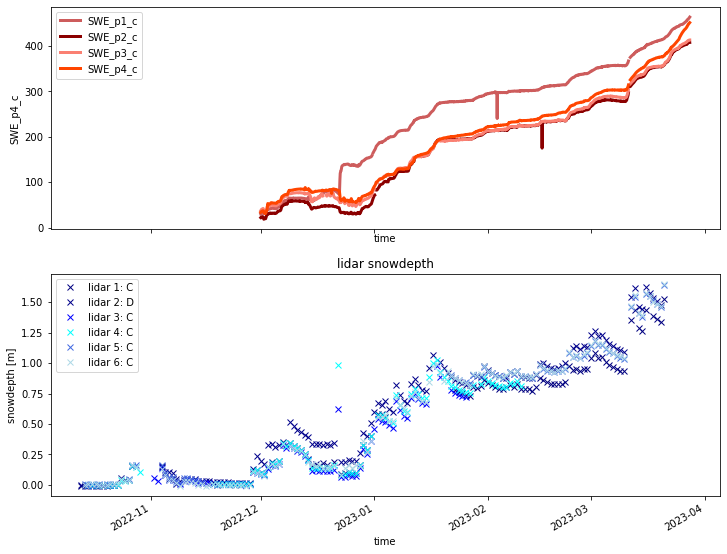

In [143]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(2, 1, figsize=(12,9), sharex=True)
ds_sos['SWE_p1_c'].plot(ax=axes[0], label='SWE_p1_c',color='indianred', linewidth=3)
ds_sos['SWE_p2_c'].plot(ax=axes[0], label='SWE_p2_c',color='darkred', linewidth=3)
ds_sos['SWE_p3_c'].plot(ax=axes[0], label='SWE_p3_c',color='salmon', linewidth=3)
ds_sos['SWE_p4_c'].plot(ax=axes[0], label='SWE_p4_c',color='orangered', linewidth=3)
axes[0].legend()


ds1["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='navy') #C, UW
ds2["snowdepth"].sel(stat=s,pillow="D").plot(ax=axes[1],marker='x', linestyle="", label="c", color='darkblue')#UE, D
ds3["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='blue') #C, D
ds4["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='cyan') #UE, C, UW 
ds5["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='royalblue') #UE, C
ds6["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='lightblue') #C, UW, D
# plt.legend(['lidar 1', 'lidar 2','lidar 3','lidar 4','lidar 5', 'lidar 6',])
plt.title('lidar snowdepth')
axes[1].legend(['lidar 1: C', 'lidar 2: D','lidar 3: C','lidar 4: C','lidar 5: C', 'lidar 6: C',])

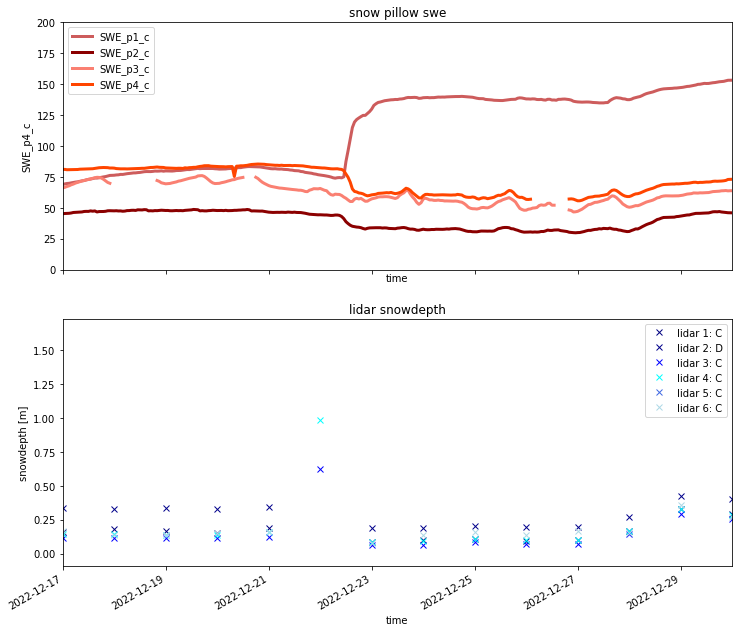

In [144]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(2, 1, figsize=(12,10), sharex=True)
ds_sos['SWE_p1_c'].plot(ax=axes[0], label='SWE_p1_c',color='indianred', linewidth=3)
ds_sos['SWE_p2_c'].plot(ax=axes[0], label='SWE_p2_c',color='darkred', linewidth=3)
ds_sos['SWE_p3_c'].plot(ax=axes[0], label='SWE_p3_c',color='salmon', linewidth=3)
ds_sos['SWE_p4_c'].plot(ax=axes[0], label='SWE_p4_c',color='orangered', linewidth=3)
axes[0].set_title('snow pillow swe')
axes[0].set_ylim(0,200)
axes[0].legend()


ds1["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='navy') #C, UW
ds2["snowdepth"].sel(stat=s,pillow="D").plot(ax=axes[1],marker='x', linestyle="", label="c", color='darkblue')#UE, D
ds3["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='blue') #C, D
ds4["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='cyan') #UE, C, UW 
ds5["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='royalblue') #UE, C
ds6["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='lightblue') #C, UW, D
# plt.legend(['lidar 1', 'lidar 2','lidar 3','lidar 4','lidar 5', 'lidar 6',])
axes[1].set_title('lidar snowdepth')
axes[1].legend(['lidar 1: C', 'lidar 2: D','lidar 3: C','lidar 4: C','lidar 5: C', 'lidar 6: C',])


plt.xlim(dt.datetime(2022,12,17), dt.datetime(2022,12,30))
plt.show()

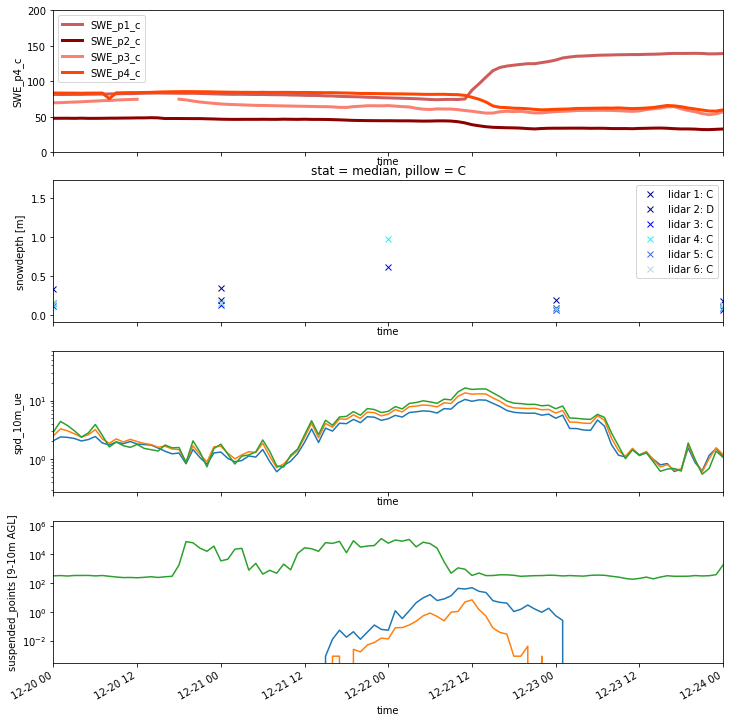

In [149]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(4, 1, figsize=(12,12), sharex=True)
ds_sos['SWE_p1_c'].plot(ax=axes[0], label='SWE_p1_c',color='indianred', linewidth=3)
ds_sos['SWE_p2_c'].plot(ax=axes[0], label='SWE_p2_c',color='darkred', linewidth=3)
ds_sos['SWE_p3_c'].plot(ax=axes[0], label='SWE_p3_c',color='salmon', linewidth=3)
ds_sos['SWE_p4_c'].plot(ax=axes[0], label='SWE_p4_c',color='orangered', linewidth=3)
axes[0].set_ylim(0,200)
axes[0].legend()


ds1["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='navy') #C, UW
ds2["snowdepth"].sel(stat=s,pillow="D").plot(ax=axes[1],marker='x', linestyle="", label="c", color='darkblue')#UE, D
ds3["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='blue') #C, D
ds4["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='cyan') #UE, C, UW 
ds5["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='royalblue') #UE, C
ds6["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='lightblue') #C, UW, D
# plt.legend(['lidar 1', 'lidar 2','lidar 3','lidar 4','lidar 5', 'lidar 6',])
plt.title('lidar snowdepth')
axes[1].legend(['lidar 1: C', 'lidar 2: D','lidar 3: C','lidar 4: C','lidar 5: C', 'lidar 6: C',])

sos_dataset_60min['spd_1m_ue'].plot(ax=axes[2], label='1m wind speed')
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[2], label='3m')
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[2], label='10m')
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[3], label='1m snow flux')
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[3], label='2m')
lidar_particles['suspended_points'].plot(ax=axes[3], label='10 m lidar snow flux')

# axes[0].set_xlabel("")
axes[2].set_yscale("log")
axes[3].set_yscale("log")


plt.xlim(dt.datetime(2022,12,20), dt.datetime(2022,12,24))
# plt.xlim(dt.datetime(2022,12,17), dt.datetime(2022,12,30))

plt.show()

In [151]:
# calculate density
sos_dataset_60min_interpolated = ds_sos.interp_like(ds6)
density_uw = sos_dataset_60min_interpolated['SWE_p1_c'] / ds6.sel(pillow='UW', stat='median')['snowdepth']
density_c = sos_dataset_60min_interpolated['SWE_p3_c'] / ds6.sel(pillow='C', stat='median')['snowdepth']
density_d = sos_dataset_60min_interpolated['SWE_p4_c'] / ds6.sel(pillow='D', stat='median')['snowdepth']

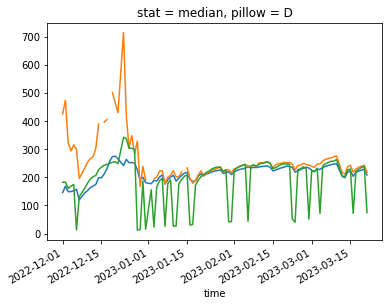

In [153]:
density_uw.plot()
density_c.plot()
density_d.plot()

In [197]:
# it looks like something is wrong with the density of c, so we are not going to include that below. 

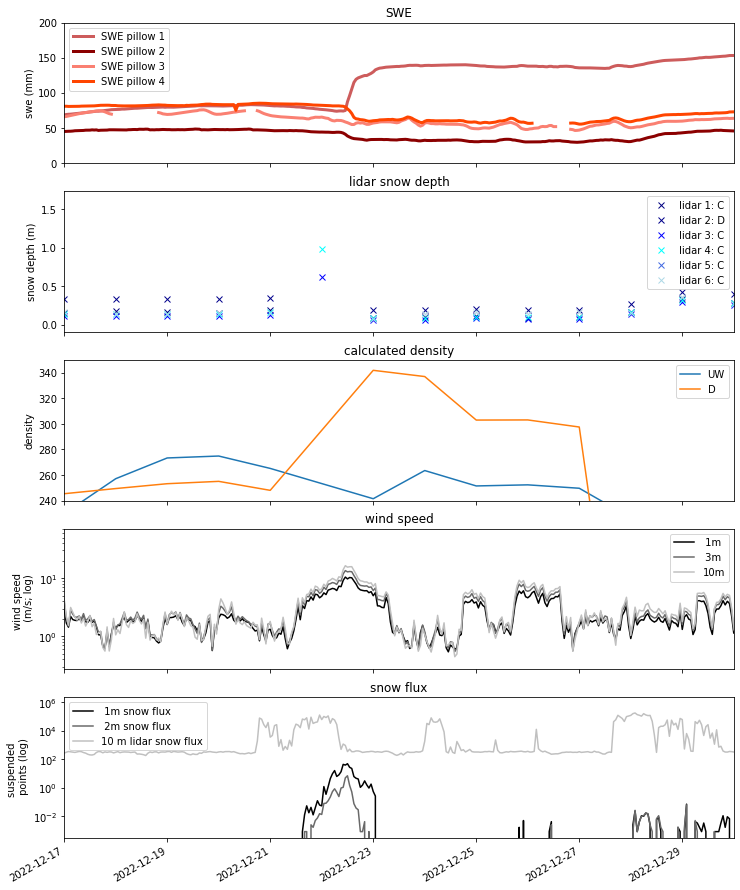

In [232]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(5, 1, figsize=(12,15), sharex=True)
# SWE
ds_sos['SWE_p1_c'].plot(ax=axes[0], label='SWE pillow 1',color='indianred', linewidth=3)
ds_sos['SWE_p2_c'].plot(ax=axes[0], label='SWE pillow 2',color='darkred', linewidth=3)
ds_sos['SWE_p3_c'].plot(ax=axes[0], label='SWE pillow 3',color='salmon', linewidth=3)
ds_sos['SWE_p4_c'].plot(ax=axes[0], label='SWE pillow 4',color='orangered', linewidth=3)
# ds_precip['acc_precp'].plot(ax=axes[0], label='Precipitation', color='blue', linewidth=3)

axes[0].set_ylim(0,200)
axes[0].set_xlabel("")
axes[0].set_ylabel("swe (mm)")
axes[0].set_title("SWE")
axes[0].legend()

# SNOW DEPTH
ds1["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='navy') #C, UW
ds2["snowdepth"].sel(stat=s,pillow="D").plot(ax=axes[1],marker='x', linestyle="", label="c", color='darkblue')#UE, D
ds3["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='blue') #C, D
ds4["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='cyan') #UE, C, UW 
ds5["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='royalblue') #UE, C
ds6["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='lightblue') #C, UW, D
# plt.legend(['lidar 1', 'lidar 2','lidar 3','lidar 4','lidar 5', 'lidar 6',])
axes[1].legend(['lidar 1: C', 'lidar 2: D','lidar 3: C','lidar 4: C','lidar 5: C', 'lidar 6: C',])
axes[1].set_xlabel("")
axes[1].set_ylabel("snow depth (m)")
axes[1].set_title("lidar snow depth")


# DENSITY
density_uw.plot(ax=axes[2],label='UW')
# density_c.plot(ax=axes[2],label='C') # that looks bad
density_d.plot(ax=axes[2],label='D')
axes[2].set_ylim(240,350)
axes[2].legend()
axes[2].set_xlabel("")
axes[2].set_ylabel("density")
axes[2].set_title("calculated density")


# WIND 
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[3], label=' 1m', color='black')
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[3], label=' 3m', color='dimgrey')
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[3], label='10m', color='silver')
axes[3].legend()
axes[3].set_yscale("log")
axes[3].set_xlabel("")
axes[3].set_ylabel("wind speed \n (m/s; log)")
axes[3].set_title("wind speed")



# FLUX
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[4], label=' 1m snow flux', color='black')
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[4], label=' 2m snow flux', color='dimgrey')
lidar_particles['suspended_points'].plot(ax=axes[4], label='10 m lidar snow flux', color='silver')
axes[4].legend()
axes[4].set_yscale("log")
axes[4].set_xlabel("")
axes[4].set_ylabel("suspended \n points (log)")
axes[4].set_title("snow flux")


# plt.xlim(dt.datetime(2022,12,20), dt.datetime(2022,12,25)) # smaller time period
plt.xlim(dt.datetime(2022,12,17), dt.datetime(2022,12,30)) # bigger time period

plt.show()

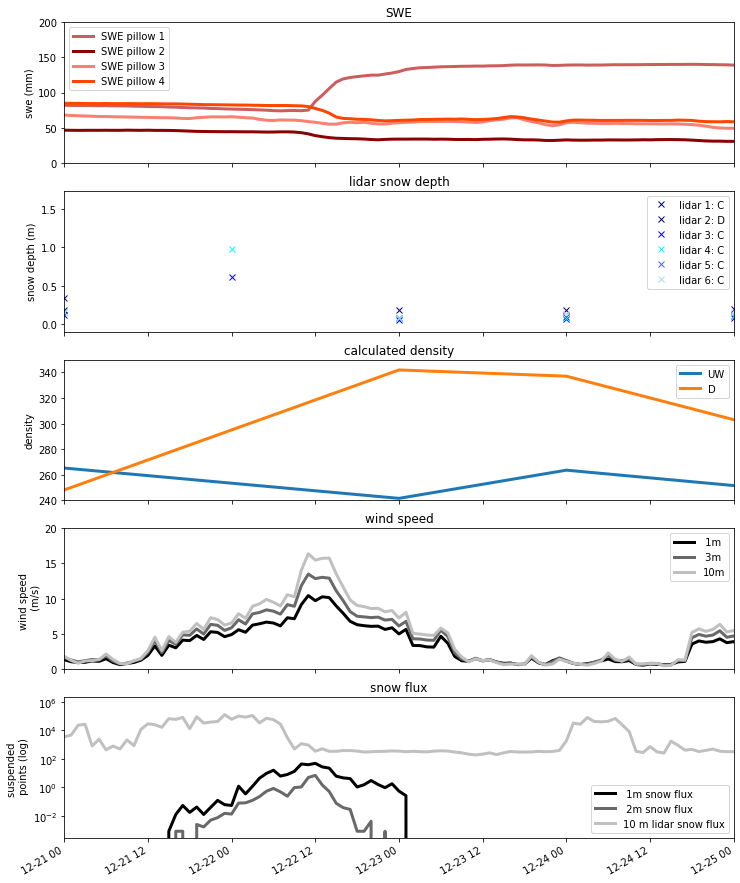

In [231]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(5, 1, figsize=(12,15), sharex=True)
# SWE
ds_sos['SWE_p1_c'].plot(ax=axes[0], label='SWE pillow 1',color='indianred', linewidth=3)
ds_sos['SWE_p2_c'].plot(ax=axes[0], label='SWE pillow 2',color='darkred', linewidth=3)
ds_sos['SWE_p3_c'].plot(ax=axes[0], label='SWE pillow 3',color='salmon', linewidth=3)
ds_sos['SWE_p4_c'].plot(ax=axes[0], label='SWE pillow 4',color='orangered', linewidth=3)
# ds_precip['acc_precp'].plot(ax=axes[0], label='Precipitation', color='blue', linewidth=3)

axes[0].set_ylim(0,200)
axes[0].set_xlabel("")
axes[0].set_ylabel("swe (mm)")
axes[0].set_title("SWE")
axes[0].legend()

# SNOW DEPTH
ds1["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='navy') #C, UW
ds2["snowdepth"].sel(stat=s,pillow="D").plot(ax=axes[1],marker='x', linestyle="", label="c", color='darkblue')#UE, D
ds3["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='blue') #C, D
ds4["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='cyan') #UE, C, UW 
ds5["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='royalblue') #UE, C
ds6["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='lightblue') #C, UW, D
# plt.legend(['lidar 1', 'lidar 2','lidar 3','lidar 4','lidar 5', 'lidar 6',])
axes[1].legend(['lidar 1: C', 'lidar 2: D','lidar 3: C','lidar 4: C','lidar 5: C', 'lidar 6: C',])
axes[1].set_xlabel("")
axes[1].set_ylabel("snow depth (m)")
axes[1].set_title("lidar snow depth")


# DENSITY
density_uw.plot(ax=axes[2],label='UW', linewidth=3)
# density_c.plot(ax=axes[2],label='C') # that looks bad
density_d.plot(ax=axes[2],label='D', linewidth=3)
axes[2].set_ylim(240,350)
axes[2].legend()
axes[2].set_xlabel("")
axes[2].set_ylabel("density")
axes[2].set_title("calculated density")


# WIND 
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[3], label=' 1m', color='black', linewidth=3)
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[3], label=' 3m', color='dimgrey', linewidth=3)
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[3], label='10m', color='silver', linewidth=3)
axes[3].legend()
axes[3].set_xlabel("")
axes[3].set_ylim(0,20)
axes[3].set_ylabel("wind speed \n (m/s)")
axes[3].set_title("wind speed")


# FLUX
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[4], label=' 1m snow flux', color='black', linewidth=3)
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[4], label=' 2m snow flux', color='dimgrey', linewidth=3)
lidar_particles['suspended_points'].plot(ax=axes[4], label='10 m lidar snow flux', color='silver', linewidth=3)
axes[4].legend()
axes[4].set_yscale("log")
axes[4].set_xlabel("")
axes[4].set_ylabel("suspended \n points (log)")
axes[4].set_title("snow flux")


plt.xlim(dt.datetime(2022,12,21), dt.datetime(2022,12,25)) # smaller time period
# plt.xlim(dt.datetime(2022,12,17), dt.datetime(2022,12,30)) # bigger time period

plt.show()

 ________________________________________
***Problem 1 Writing Solution:*** 

Things I would fix/do if I had more time to make it perfect ;)
* I know the lidar snow flux is on a different scale than the other snow flux,  but I wanted to see them together for the timing, I can't figure out how to change it. 
* I removed the density calculated from C (Danny said there was something wrong with it... I trust him, it looked pretty bad in the first plots) 

- Plot (A): There is an increase in SWE on pillow 1 on 22 Dec at 12:00. 
- Plot (B): The lidar snow depth also shows an increase in snow depth, specifically at lidar 4 C. 
- Plot (C): There is an increase in calculated density for D during this time, then you see an increase in density at UW later on 24 Dec. 
- Plot (D): The wind speed (across heights) increases during the "snow blowing" event on 22 Dec. There is a clear decrease by 23 Dec (once precip starts, seen in previous plots)
- Plot (E): The snow flux increases during this time period also-- **blowing snow event it is!**
 ________________________________________

# Problem 2: Testing wind thresholds and particle counts
**There is a threshold wind speed that must be exceeded for snow transport. Li and Pomeroy 1997 state that 10-m wind speeds must exceed about 7.7 m/s for dry snow transport and about 9.9 m/s for wet snow transport. Use the 10-m wind speed measurements and particle counters to test if these thresholds match the observations at Kettle Ponds. If you have time, further discuss the questions at the end of Lab 4-2.**

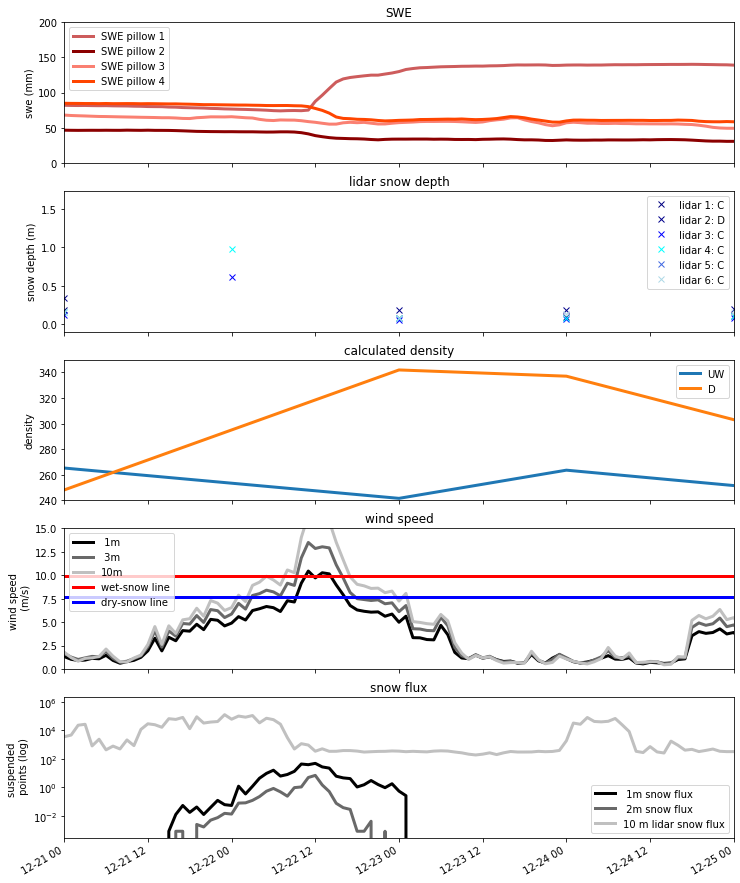

In [230]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(5, 1, figsize=(12,15), sharex=True)
# SWE
ds_sos['SWE_p1_c'].plot(ax=axes[0], label='SWE pillow 1',color='indianred', linewidth=3)
ds_sos['SWE_p2_c'].plot(ax=axes[0], label='SWE pillow 2',color='darkred', linewidth=3)
ds_sos['SWE_p3_c'].plot(ax=axes[0], label='SWE pillow 3',color='salmon', linewidth=3)
ds_sos['SWE_p4_c'].plot(ax=axes[0], label='SWE pillow 4',color='orangered', linewidth=3)
# ds_precip['acc_precp'].plot(ax=axes[0], label='Precipitation', color='blue', linewidth=3)

axes[0].set_ylim(0,200)
axes[0].set_xlabel("")
axes[0].set_ylabel("swe (mm)")
axes[0].set_title("SWE")
axes[0].legend()

# SNOW DEPTH
ds1["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='navy') #C, UW
ds2["snowdepth"].sel(stat=s,pillow="D").plot(ax=axes[1],marker='x', linestyle="", label="c", color='darkblue')#UE, D
ds3["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='blue') #C, D
ds4["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='cyan') #UE, C, UW 
ds5["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='royalblue') #UE, C
ds6["snowdepth"].sel(stat=s,pillow="C").plot(ax=axes[1],marker='x', linestyle="", label="c", color='lightblue') #C, UW, D
# plt.legend(['lidar 1', 'lidar 2','lidar 3','lidar 4','lidar 5', 'lidar 6',])
axes[1].legend(['lidar 1: C', 'lidar 2: D','lidar 3: C','lidar 4: C','lidar 5: C', 'lidar 6: C',])
axes[1].set_xlabel("")
axes[1].set_ylabel("snow depth (m)")
axes[1].set_title("lidar snow depth")


# DENSITY
density_uw.plot(ax=axes[2],label='UW', linewidth=3)
# density_c.plot(ax=axes[2],label='C') # that looks bad
density_d.plot(ax=axes[2],label='D', linewidth=3)
axes[2].set_ylim(240,350)
axes[2].legend()
axes[2].set_xlabel("")
axes[2].set_ylabel("density")
axes[2].set_title("calculated density")


# WIND 
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[3], label=' 1m', color='black', linewidth=3)
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[3], label=' 3m', color='dimgrey', linewidth=3)
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[3], label='10m', color='silver', linewidth=3)

axes[3].axhline(y=9.9, color='red', label='wet-snow line', linewidth=3)
axes[3].axhline(y=7.7, color='blue', label='dry-snow line', linewidth=3)

axes[3].legend()
axes[3].set_ylim(0,15)
axes[3].set_xlabel("")
axes[3].set_ylabel("wind speed \n (m/s)")
axes[3].set_title("wind speed")

#**There is a threshold wind speed that must be exceeded for snow transport. 
#Li and Pomeroy 1997 state that 10-m wind speeds must exceed about 7.7 m/s for dry snow transport and about 9.9 m/s for wet snow transport. 
#Use the 10-m wind speed measurements and particle counters to test if these thresholds match the observations at Kettle Ponds. 
#If you have time, further discuss the questions at the end of Lab 4-2.**

# FLUX
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[4], label=' 1m snow flux', color='black', linewidth=3)
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[4], label=' 2m snow flux', color='dimgrey', linewidth=3)
lidar_particles['suspended_points'].plot(ax=axes[4], label='10 m lidar snow flux', color='silver', linewidth=3)

axes[4].legend()
axes[4].set_yscale("log")
axes[4].set_xlabel("")
axes[4].set_ylabel("suspended \n points (log)")
axes[4].set_title("snow flux")


plt.xlim(dt.datetime(2022,12,21), dt.datetime(2022,12,25)) # smaller time period
# plt.xlim(dt.datetime(2022,12,17), dt.datetime(2022,12,30)) # bigger time period

plt.show()

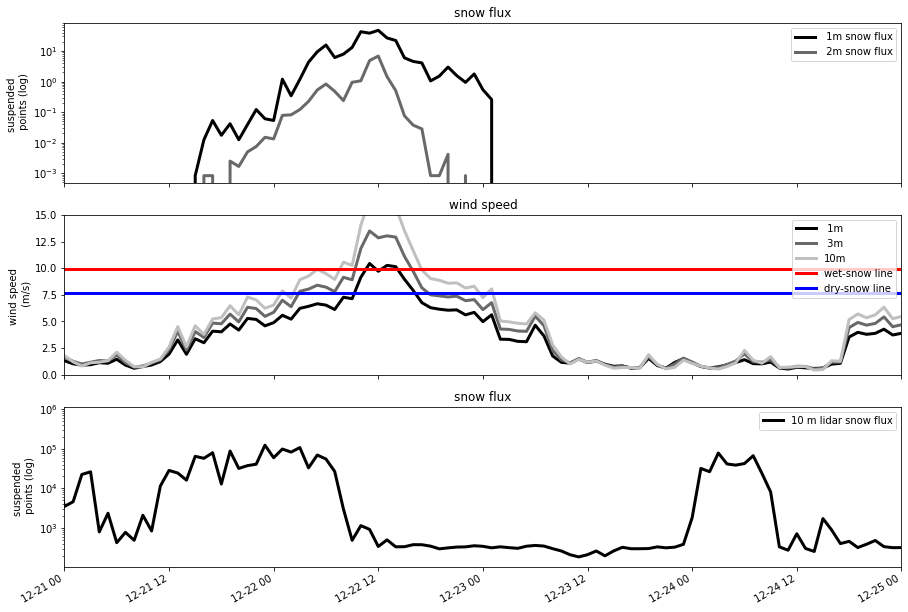

In [226]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(3, 1, figsize=(15,10), sharex=True)

#**There is a threshold wind speed that must be exceeded for snow transport. 
#Li and Pomeroy 1997 state that 10-m wind speeds must exceed about 7.7 m/s for dry snow transport and about 9.9 m/s for wet snow transport. 
#Use the 10-m wind speed measurements and particle counters to test if these thresholds match the observations at Kettle Ponds. 
#If you have time, further discuss the questions at the end of Lab 4-2.**

# FLUX
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[0], label=' 1m snow flux', color='black', linewidth=3)
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[0], label=' 2m snow flux', color='dimgrey', linewidth=3)

axes[0].legend()
axes[0].set_yscale("log")
axes[0].set_xlabel("")
axes[0].set_ylabel("suspended \n points (log)")
axes[0].set_title("snow flux")

# WIND 
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[1], label=' 1m', color='black', linewidth=3)
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[1], label=' 3m', color='dimgrey', linewidth=3)
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[1], label='10m', color='silver', linewidth=3)

axes[1].axhline(y=9.9, color='red', label='wet-snow line', linewidth=3)
axes[1].axhline(y=7.7, color='blue', label='dry-snow line', linewidth=3)

axes[1].legend()
axes[1].set_ylim(0,15)
axes[1].set_xlabel("")
axes[1].set_ylabel("wind speed \n (m/s)")
axes[1].set_title("wind speed")

# LIDAR FLUX ALL ALONE OVER HERE THIS TIME
lidar_particles['suspended_points'].plot(ax=axes[2], label='10 m lidar snow flux', color='black', linewidth=3)
axes[2].legend()
axes[2].set_yscale("log")
axes[2].set_xlabel("")
axes[2].set_ylabel("suspended \n points (log)")
axes[2].set_title("snow flux")


plt.xlim(dt.datetime(2022,12,21), dt.datetime(2022,12,25)) # smaller time period
# plt.xlim(dt.datetime(2022,12,17), dt.datetime(2022,12,30)) # bigger time period

plt.show()

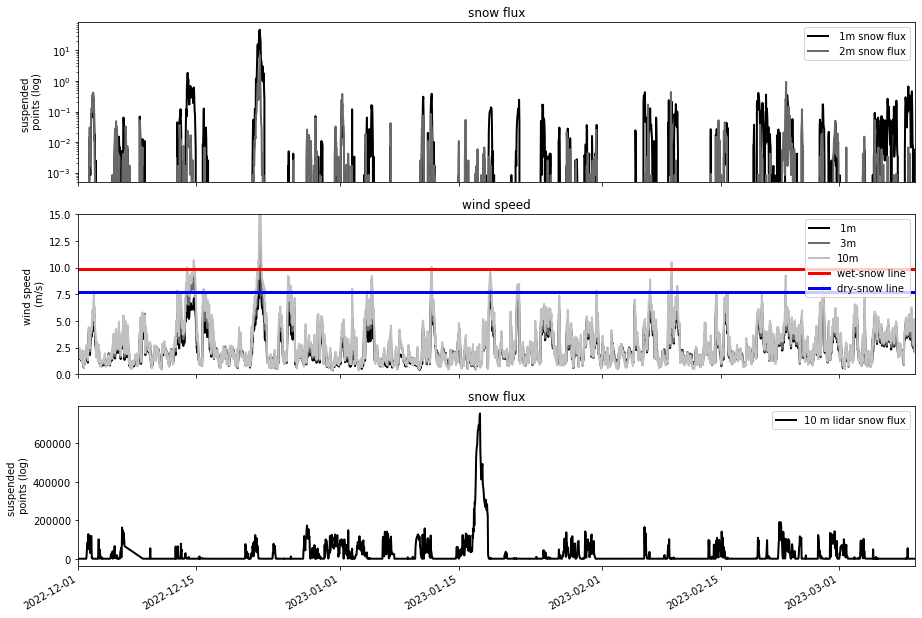

In [235]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(3, 1, figsize=(15,10), sharex=True)

#**There is a threshold wind speed that must be exceeded for snow transport. 
#Li and Pomeroy 1997 state that 10-m wind speeds must exceed about 7.7 m/s for dry snow transport and about 9.9 m/s for wet snow transport. 
#Use the 10-m wind speed measurements and particle counters to test if these thresholds match the observations at Kettle Ponds. 
#If you have time, further discuss the questions at the end of Lab 4-2.**

# FLUX
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[0], label=' 1m snow flux', color='black', linewidth=2)
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[0], label=' 2m snow flux', color='dimgrey', linewidth=2)

axes[0].legend()
axes[0].set_yscale("log")
axes[0].set_xlabel("")
axes[0].set_ylabel("suspended \n points (log)")
axes[0].set_title("snow flux")

# WIND 
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[1], label=' 1m', color='black', linewidth=2)
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[1], label=' 3m', color='dimgrey', linewidth=2)
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[1], label='10m', color='silver', linewidth=2)

axes[1].axhline(y=9.9, color='red', label='wet-snow line', linewidth=3)
axes[1].axhline(y=7.7, color='blue', label='dry-snow line', linewidth=3)

axes[1].legend()
axes[1].set_ylim(0,15)
axes[1].set_xlabel("")
axes[1].set_ylabel("wind speed \n (m/s)")
axes[1].set_title("wind speed")

# LIDAR FLUX ALL ALONE OVER HERE THIS TIME
lidar_particles['suspended_points'].plot(ax=axes[2], label='10 m lidar snow flux', color='black', linewidth=2)
axes[2].legend()
# axes[2].set_yscale("log")
axes[2].set_xlabel("")
axes[2].set_ylabel("suspended \n points (log)")
axes[2].set_title("snow flux")


plt.xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,10)) # entire season, downloaded so far

plt.show()

________________________________________
***Problem 2 Writing Solution:*** 

Plot (1): For our blowing snow event from Problem 1, the wind speed at all three measurement heights exceeds both the thresholds. 

Plot (2): But, from the plots for the entire season at Kettle ponds, there are very fewer events than I expected where the wind speed exceeded those thresholds. 
* Since I know that Kettle Ponds does have blowing snow (outside of those few events where the wind speed exceeded the literature values) I assume that the dry-snow threshold is not low enough for this site. Perhaps snow is blowing around closer to 5 m/s at Kettle Ponds when comparing with the snow flux data. 
* The snow flux increases at those times when the wind speed does pass the threshold, but there are other times when the flux increases as well (where I assume there is blowing snow). I have some thoughts about the lidar snow flux data (below). 

I am not sure how much I can trust the *lidar snow flux* for capturing "blowing snow" when there is also falling snow (precip). 
* The lidar snow flux seems to be sensitive to falling snow from the sky (makes sense) and is very noisy during precip compared to the 1m and 2m snow flux instruments. 
* Also, there is a HUGE spike around 15 Jan in the lidar snow flux. I do not think this is realistic compared to the other values so now I am skeptical of the data. I've never worked with lidar blowing snow data before, so not sure. 


________________________________________

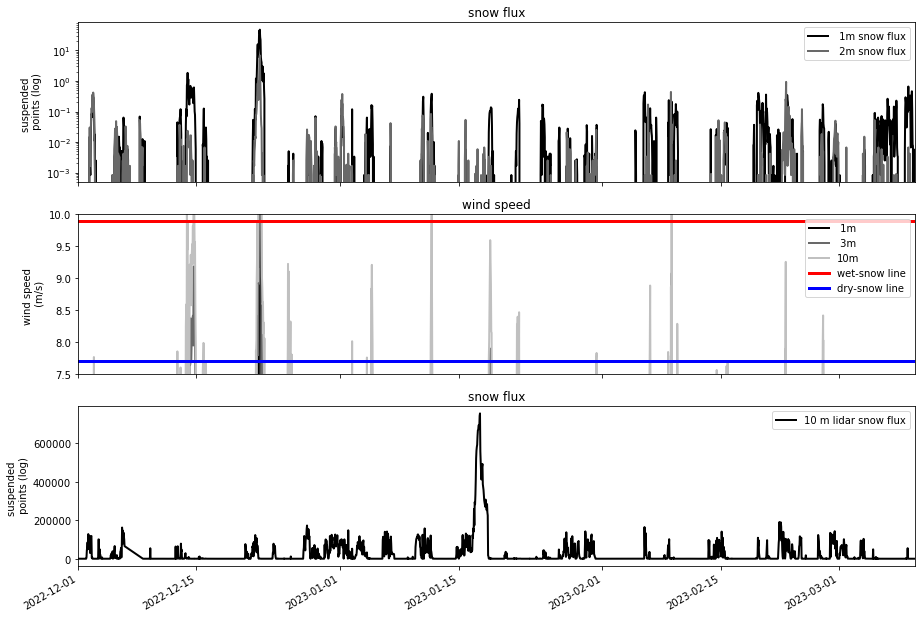

In [237]:
# We'll do this here for the central pillow location; you will want to repeat for the others
s="median"
fig, axes = plt.subplots(3, 1, figsize=(15,10), sharex=True)

#**There is a threshold wind speed that must be exceeded for snow transport. 
#Li and Pomeroy 1997 state that 10-m wind speeds must exceed about 7.7 m/s for dry snow transport and about 9.9 m/s for wet snow transport. 
#Use the 10-m wind speed measurements and particle counters to test if these thresholds match the observations at Kettle Ponds. 
#If you have time, further discuss the questions at the end of Lab 4-2.**

# FLUX
sos_dataset_60min['SF_avg_1m_ue'].plot(ax=axes[0], label=' 1m snow flux', color='black', linewidth=2)
sos_dataset_60min['SF_avg_2m_ue'].plot(ax=axes[0], label=' 2m snow flux', color='dimgrey', linewidth=2)

axes[0].legend()
axes[0].set_yscale("log")
axes[0].set_xlabel("")
axes[0].set_ylabel("suspended \n points (log)")
axes[0].set_title("snow flux")

# WIND 
sos_dataset_60min['spd_1m_ue'].plot(ax=axes[1], label=' 1m', color='black', linewidth=2)
sos_dataset_60min['spd_3m_ue'].plot(ax=axes[1], label=' 3m', color='dimgrey', linewidth=2)
sos_dataset_60min['spd_10m_ue'].plot(ax=axes[1], label='10m', color='silver', linewidth=2)

axes[1].axhline(y=9.9, color='red', label='wet-snow line', linewidth=3)
axes[1].axhline(y=7.7, color='blue', label='dry-snow line', linewidth=3)

axes[1].legend()
axes[1].set_ylim(7.5,10)
axes[1].set_xlabel("")
axes[1].set_ylabel("wind speed \n (m/s)")
axes[1].set_title("wind speed")

# LIDAR FLUX ALL ALONE OVER HERE THIS TIME
lidar_particles['suspended_points'].plot(ax=axes[2], label='10 m lidar snow flux', color='black', linewidth=2)
axes[2].legend()
# axes[2].set_yscale("log")
axes[2].set_xlabel("")
axes[2].set_ylabel("suspended \n points (log)")
axes[2].set_title("snow flux")


plt.xlim(dt.datetime(2022,12,1), dt.datetime(2023,3,10)) # entire season, downloaded so far

plt.show()

# Problem 3: Project
**Please give a brief update of where you are with your project. At this point you should have acquired data that you can plot. Include one example plot of the data in this homework. Let us know if you have any questions or concerns at this point.**

________________________________________
*ArcGIS Model for Forest Management* 

Work flow in ArcGIS Pro for using your lidar data to determine if snow lasts longer in the forest or in the open at your site. NCALM lidar data is used as the test case for this.  

*Variables*
* **dsm**: digital surface model
* **dtm**: digital terrain model
* **chm**: digital canopy model

* **dce**: distance to canopy edge 
    * (methods adapted from Mazzotti et al., 2019)
    
   
* **dah**: diurnal anisotropic heat index 
    * (methods from Cristea et al., 2017)

*Methods steps* 
* Lidar point cloud to dtm and dsm
     * dsm to produce chm
         * get dce from chm 
     * dtm to produce slope, aspect
         * get dah from slope and aspect 
* dtm snow on - dtm snow off to get snow depth 

Put all of these things together to tell us if snow lasts longer in the forest, gaps, or open in our sites. 
________________________________________


In [240]:
!pwd

/home/jovyan/Week4


In [250]:
raster = xr.open_dataset('/home/jovyan/Data/cer_smalldomain_raster_to_netcdf.nc')
raster

<xarray.Dataset>
Dimensions:             (x: 736, y: 649, band: 1)
Coordinates:
  * x                   (x) float64 1.528e+06 1.528e+06 ... 1.53e+06 1.53e+06
  * y                   (y) float64 6.914e+05 6.914e+05 ... 6.894e+05 6.894e+05
  * band                (band) int32 1
Data variables:
    snowdepth           (band, y, x) float32 ...
    dce                 (band, y, x) float32 ...
    dce_reclass         (band, y, x) float32 ...
    slope               (band, y, x) float32 ...
    aspect              (band, y, x) float32 ...
    dah                 (band, y, x) float32 ...
    dah_reclass         (band, y, x) float32 ...
    dce_giulia          (band, y, x) float32 ...
    dce_giulia_reclass  (band, y, x) float32 ...
    spatial_ref         int32 ...

Text(0.5, 1.0, 'dah')

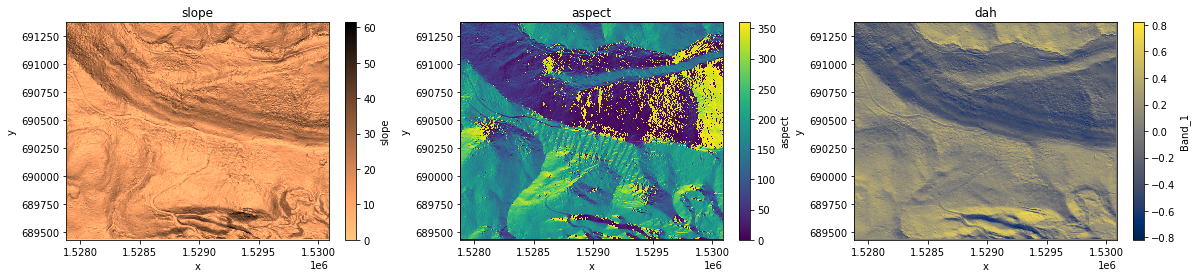

In [271]:
fig, axes = plt.subplots(1, 3, figsize=(20,4), sharex=True)
raster.slope.plot(ax=axes[0], cmap='copper_r')
axes[0].set_title("slope")

raster.aspect.plot(ax=axes[1], cmap='viridis')
axes[1].set_title("aspect")

raster.dah.plot(ax=axes[2], cmap='cividis')
axes[2].set_title("dah")

Text(0.5, 1.0, 'snow depth')

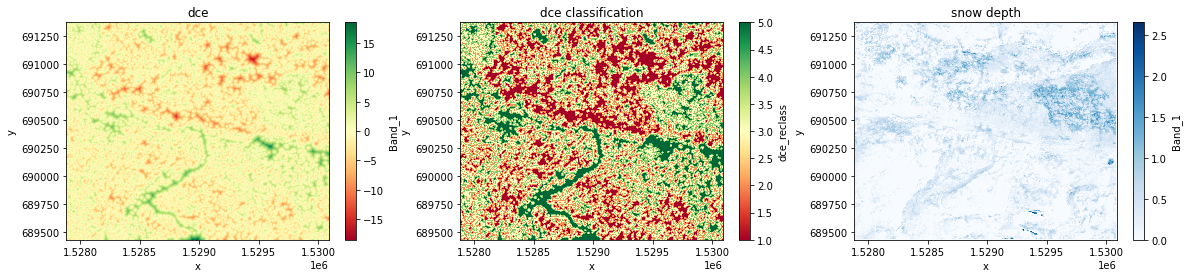

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,4), sharex=True)
raster.dce.plot(ax=axes[0], cmap='RdYlGn')
axes[0].set_title("dce")

raster.dce_reclass.plot(ax=axes[1], cmap='RdYlGn')
axes[1].set_title("dce classification")

raster.snowdepth.plot(ax=axes[2], cmap='Blues')
axes[2].set_title("snow depth")

Text(0.5, 1.0, 'dah classification')

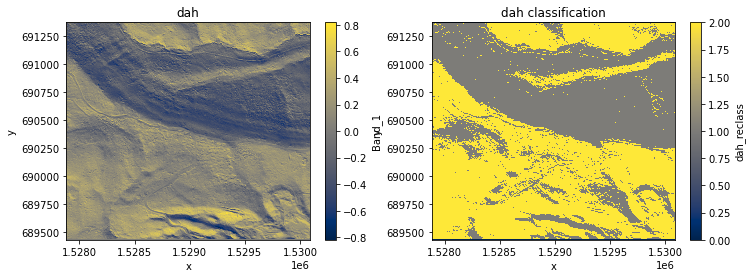

In [277]:
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharex=True)
raster.dah.plot(ax=axes[0], cmap='cividis')
axes[0].set_title("dah")

raster.dah_reclass.plot(ax=axes[1], cmap='cividis')
axes[1].set_title("dah classification")

In [279]:
ds = raster.copy(deep=True)

In [280]:
# fix up dah classification for zero to be with negative values
dah_reclass_2 = ds.dah.copy(deep=True)
dah_reclass_2 = dah_reclass_2.where(dah_reclass_2 <= 0, 1) #pandas vs numpy .where's are so weird UGH. threw me off again
dah_reclass_2 = dah_reclass_2.where(dah_reclass_2 > 0, -1)
dah_reclass_2_flat = dah_reclass_2.values.flatten()

In [281]:
# flatten everything to save time later
dce_flat=ds.dce.values.flatten()
dce_reclass_flat=ds.dce_reclass.values.flatten()

dce_giulia_flat=ds.dce_giulia.values.flatten()
dce_giulia_reclass_flat=ds.dce_giulia_reclass.values.flatten()

dah_flat=ds.dah.values.flatten()
dah_reclass_flat=ds.dah_reclass.values.flatten()

snowdepth_flat=ds.snowdepth.values.flatten()
slope_flat=ds.slope.values.flatten()
aspect_flat=ds.aspect.values.flatten()

In [289]:
import seaborn as sns
sns.set_theme()

In [286]:
# labels and cosntants 
# titles
cer_title = 'CER Small Domain'

# labels 
dce_label = 'distance to canopy edge (m)'
dah_label = 'diurnal anisotropic heat index'
slope_label = 'slope (degrees)'
aspect_label = 'aspect (degrees)'
snow_label = 'snow depth (m)'

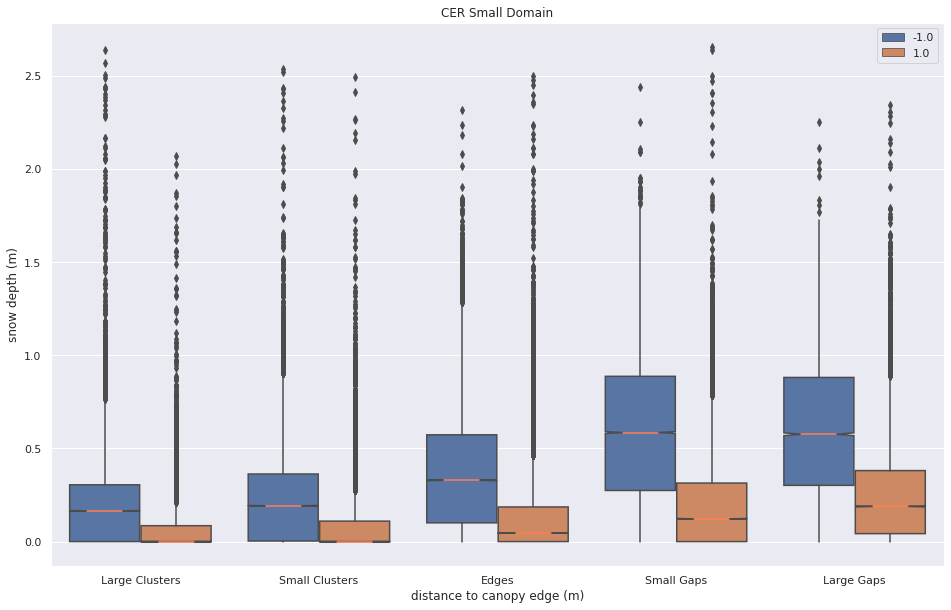

In [292]:
plt.figure(figsize=(16,10))

sns.boxplot(x=dce_reclass_flat, y=snowdepth_flat, hue=dah_reclass_2_flat, notch=True, showcaps=False, medianprops={"color":"coral"}) # palette={1: 'orange', -1: 'blue'})
plt.xlabel(dce_label)
plt.ylabel(snow_label)
plt.title('CER Small Domain')
plt.xticks([0,1,2,3,4], ['Large Clusters','Small Clusters','Edges','Small Gaps', 'Large Gaps'])

plt.show()